# Crawling and Saving .txt Files to Drive

In [ ]:
!pip3 install newspaper3k

     |████████████████████████████████| 215kB 6.0MB/s 
     |████████████████████████████████| 92kB 8.0MB/s 
     |████████████████████████████████| 7.4MB 23.2MB/s 
     |████████████████████████████████| 81kB 9.8MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-cp36-none-any.whl size=13538 sha256=68c5288232539835b55b5bed9a4275174faef3e9b7761dcc31cd404cf8d2cf25
  Stored in directory: /root/.cache/pip/wheels/81/2b/43/a02ede72324dd40cdd7ca53aad718c7710628e91b8b0dc0f02
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-cp36-none-any.whl size=3358 sha256=2ff377617f12ffe5d77375046ec7c5edf43fffa82f03768f59205968e29e177e
  Stored in directory: /root/.cache/pip/wheels/de/03/ca/778e3a7a627e3d98836cc890e7cb40c7575424cfd3340f40ed
  Created wheel for jieba3k: filename=jieba3k-0.35.1-cp36-none-any.whl size=7398406 sha256=3668a61f2976bad42c6ddb9e8322e908dc213158f20df86ef2a187d1bc6fcee6
  Stored in directory: /root/.cache/pip/wheels/83/15/9c/a3f1f67e7f7181170ad37d32e503c35d

In [ ]:
import newspaper
import keras
import requests
import zipfile
from tqdm import tqdm
from collections import Counter
import numpy as np

from keras.models import Model
from keras.layers import Input, Dense, Reshape, dot
from keras.layers.embeddings import Embedding
from keras.preprocessing.sequence import skipgrams
from keras.preprocessing import sequence

import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def create_txt(base_url, limit):
  cnn = newspaper.build(base_url)
  i = 0
  for article in cnn.articles:
      try:
        article.download()
        article.parse()
        a = article.text
        if a != "":
          a = a.strip()
          texts.append(a)
          print(i,'th = ',a)
          i = i + 1
          if i >= limit:
            break
      except:
        print("ERROR AT ",i,"th ARTICLE")

In [ ]:
def save_txt(texts, name_of_file):
  with open('/content/drive/MyDrive/applied_ai_hw3/' + name_of_file+ '.txt', 'w') as filehandle:
      for listitem in texts:
          filehandle.write('%s\n' % listitem)
      print(name_of_file, ".txt saved in drive.")

In [ ]:
def fetch_words(txt_name):
    words = []
    with open(("/content/drive/MyDrive/applied_ai_hw3/" + str(txt_name)), "r") as f:
        for line in f:
            for word in line.strip().split(" "):
                words.append(word)
                
    return words

In [ ]:
def build_data(words, n_words):
    freq = [['UNKNOWN', -1]]
    
    c = Counter(words)
    pairs = list(c.items())
    pairs_filtered = sorted(pairs, key=lambda x: -x[1])[:n_words-1] 
    for word, count in pairs_filtered: 
        freq.append([word, count])
        
    dictionary = dict()
    for word, _ in freq:
        dictionary[word] = len(dictionary)
        
    data = list()
    unknown_count = 0
    for word in words:
        if word in dictionary:
            index = dictionary[word]
        else:
            index = 0  # dictionary['UNKNOWN']
            unknown_count += 1
        data.append(index)
        
    freq[0][1] = unknown_count
    
    inverse_dictionary = dict(zip(dictionary.values(), dictionary.keys()))
    return data, freq, dictionary, inverse_dictionary

In [ ]:
texts = []
create_txt('https://www.ensonhaber.com', 500)
save_txt(texts, 'ensonhaber')

Streaming output truncated to the last 5000 lines.

Şunu ifade etmek isterim. Teröristlerin cenazesine asla ve kat'a hiçbir milletvekilinin katılmaması lazım gelir. Bu millete, bu devlete saygının ve mağdurların hakkı bunu gerektirir.

Hiçbir şekilde, hiçbir milletvekili bir teröristin cenazesinde boy gösteremez. Bu mazur görülemez ve gösterilemez.





"TERÖRİST CENAZESİNİ ŞOVA DÖNÜŞTÜRMEK, HİÇBİR VEKİLİN HARCI DEĞİLDİR"

Teröristlerin anne babasıyla ilgili bazı yaklaşımlarda bulundunuz. Evet şu suçların şahsiliği genel hukuk kaidesidir. Başka bir şekilde anne babalarla ilgili taziyede bulunmanızı engelleyecek bir düzenleme söz konusu değil.

Ancak teröristlerin cenazesine katılarak bir şova dönüştürme, hiçbir milletvekilinin harcı değildir. Kabul edilemez." ifadelerini kullandı.
303 th =  CHP Grup Başkanvekili Engin Altay, partisinde patlak veren taciz ve tecavüzlerin dedikodudan ibaret olduğunu söyledi. AK Parti, savcılığın ve emniyetin olaya el koyduğunu hatırlattı.

Meclis Genel K

In [ ]:
texts = []
create_txt('https://www.ahaber.com.tr', 500) # biraz bias ekleyelim ki modelimiz akpli olsun
save_txt(texts, 'ahaber')

0 th =  SEYAHATNAME - Her cumartesi saat 16:10'da A Haber'de... 7 bölge, 81 il, 4 mevsim… Evliya Çelebi’nin izinde mekanın ve lezzetin birbirine karıştığı Türkiye’nin kısa yolu Seyahatname her hafta farklı bir durakta, tarihin ve insanın hikayesini keşfe devam ediyor... Kerim Ulak’ın sunumu ile Seyahatname her Cumartesi 16:10’da
1 th =  Hainin kim olduğu ortaya çıkacak mı?
ERROR AT  2 th ARTICLE
ERROR AT  2 th ARTICLE
2 th =  Uyanış Büyük Selçuklu'nun Elçin Hatun'u Leyla Lydia Tuğutlu’nun eski hali şoke etti! Değişimi pes dedirtti

Uyanış Büyük Selçuklu'da Elçin karakterine hayat veren Leyla Lydia Tuğutlu başarılı oyunculuğuyla ve güzelliğiyle kendisine hayran bıraktı. Özel hayatını kameralardan uzakta yaşayan Leyla Lydia Tuğutlu, hayranları tarafından mercek altına alındı. Tuğutlu hakkında araştırma yapanlar eski fotoğraflarını görünce inanamadı. İşte Uyanış Büyük Selçuklu'nun yıldızı Leyla Lydia Tuğutlu'nın yıllar içindeki inanılmaz değişimi...
3 th =  "BİR AYDIR BURADA"

Foku cep te

In [ ]:
texts = []
create_txt('https://www.hurriyet.com.tr', 500)
save_txt(texts, 'hurriyet')

Streaming output truncated to the last 5000 lines.
Rüyada beyaz yılan görmek ne demektir?

Rüyada beyaz yılan görmek, rüyayı gören kişinin çevresindeki kişilere hatta çok sevdiği kişilere karşı takınmış olduğu olumsuz ve kötü tavırların değişmesine işarettir. Normal bir hale gelmek anlamına gelir. Rüyayı gören bireyin, insanlara karşı duymuş olduğu güvensizlikten yavaşça kurtulmaya başladığına ve yakın zamanda da düzeleceğine tabir edilmektedir.

Rüyada Yeşil Yılan Görmek

Rüyada yeşil yılan görmek, dini görevlerini yerine getirmeyip, günah işlemekten keyif alan birine işarettir. Bu birey, rüyayı gören kişinin kendisi olacağı gibi etrafındaki yakın arkadaşlarından birisi de olabilir. Bu rüyayı gören bireyin davranışlarını düzene sokması veya kötü davranışları olan bireyden ileride zarar görmemek için uzaklaşması konusunda uyarı aldığı söylenebilir.

Rüyada Sarı Yılan Görmek

Rüyada sarı yılan görmek, iyi anlamlar taşımaz. Maddi manada kuvvetli, etrafı kalabalık, ismi ve sözü her yerde 

In [ ]:
texts = []
create_txt('https://www.ntv.com.tr', 500)
save_txt(texts, 'ntv')

Streaming output truncated to the last 5000 lines.
Geçtiğimiz hafta son 5 ayın en düşük seviyelerini gören dolar/TL, yeni haftanın ilk gününde 7,50 civarında işlem görüyor.

Geçen hafta 9,02'nin üzerinde kapanan euro/TL, bu sabah saatlerinde 8,93'e kadar gerilemesinin ardından hızla yükselişe geçti ve 9,10 seviyesinin üzerine çıktı.

ABD Başkanı Donald Trump'ın azil süreci ve ekonomik destek paketi gelişmelerinin piyasaların yönü üzerinde etkili olacağını ifade eden uzmanlar, yeni tip corona virüs (Covid-19) salgını ve aşılama çalışmalarına ilişkin gelişmelerin de gündemin odağındaki yerini koruduğunu dile getirdi.

VİDEO: ALTINDA YENİ BİR RALLİ YAŞANIR MI?-ARŞİV
205 th =  Web sitemizdeki çerezleri (cookie) kullanıcı deneyimini artıran teknik özellikleri desteklemek için kullanıyoruz. Aynı zamanda analitik çerezler de kullanıyoruz. Çerezleri reddetmek istiyorsanız detaylı bilgi için tıklayınız.
206 th =  Sosyal medya hesabı üzerinden yaptığı açıkamada Bilal Ekşi, ventilli (filtreli) ma



---



# Unnecessary and Unsuccessful word2vec with Crawled Data

In [ ]:
words_hurriyet = fetch_words('hurriyet.txt')
words_ahaber = fetch_words('ahaber.txt')
words_ntv = fetch_words('ntv.txt')
words_ensonhaber = fetch_words('ensonhaber.txt')

In [ ]:
print(len(words_ahaber))
print(len(words_hurriyet))
print(len(words_ntv))
print(len(words_ensonhaber))

61566
131424
95773
134143


In [ ]:
words = words_ahaber + words_ensonhaber + words_hurriyet + words_ntv

In [ ]:
len(words)

422906

In [ ]:
data, freq, dictionary, inverse_dictionary = build_data(words, 20000)

In [ ]:
vector_dim = 300
epochs = 200000
vocabulary_upper_limit = 20000

In [ ]:
sampling_table = sequence.make_sampling_table(vocabulary_upper_limit)
couples, labels = skipgrams(data, vocabulary_upper_limit, window_size=3, sampling_table=sampling_table)
word_target, word_context = zip(*couples)
word_target = np.array(word_target, dtype="int32")
word_context = np.array(word_context, dtype="int32")

In [ ]:
input_target, input_context = Input(shape=(1)), Input(shape=(1))

embedding = Embedding(vocabulary_upper_limit, vector_dim, input_length=1, name='embedding')

target = embedding(input_target)
target = Reshape((vector_dim, 1))(target)

context = embedding(input_context)
context = Reshape((vector_dim, 1))(context)

dot_product = dot([target, context],  axes=1)
dot_product = Reshape((1,))(dot_product)

output = Dense(1, activation='sigmoid')(dot_product)

model = Model(inputs=[input_target, input_context], outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
batch_size = 4096
epochs = 5
for itr in range(epochs):
    for batch_num in range(len(word_target)//batch_size):
      myslice = slice(batch_num*batch_size,(batch_num+1)*batch_size)
  
      batch_inputs = np.array(word_target[myslice]).reshape(batch_size,1)
      batch_contexts = np.array(word_context[myslice]).reshape(batch_size,1)
      batch_labels = np.array(labels[myslice]).reshape(batch_size,1)

      loss = model.train_on_batch([batch_inputs,batch_contexts],batch_labels)
      print(f"Epoch: {itr}\tBatch Num:{batch_num}/{len(word_target)//batch_size}\tloss={loss}")

Epoch: 0	Batch Num:0/294	loss=0.3364143669605255
Epoch: 0	Batch Num:1/294	loss=0.34356507658958435
Epoch: 0	Batch Num:2/294	loss=0.34173935651779175
Epoch: 0	Batch Num:3/294	loss=0.34588998556137085
Epoch: 0	Batch Num:4/294	loss=0.3445168733596802
Epoch: 0	Batch Num:5/294	loss=0.346973180770874
Epoch: 0	Batch Num:6/294	loss=0.34585148096084595
Epoch: 0	Batch Num:7/294	loss=0.3512764573097229
Epoch: 0	Batch Num:8/294	loss=0.34992173314094543
Epoch: 0	Batch Num:9/294	loss=0.3451704978942871
Epoch: 0	Batch Num:10/294	loss=0.34739530086517334
Epoch: 0	Batch Num:11/294	loss=0.35041874647140503
Epoch: 0	Batch Num:12/294	loss=0.3459579050540924
Epoch: 0	Batch Num:13/294	loss=0.3475688695907593
Epoch: 0	Batch Num:14/294	loss=0.3426405191421509
Epoch: 0	Batch Num:15/294	loss=0.3567495346069336
Epoch: 0	Batch Num:16/294	loss=0.3463422358036041
Epoch: 0	Batch Num:17/294	loss=0.3502426743507385
Epoch: 0	Batch Num:18/294	loss=0.3365784287452698
Epoch: 0	Batch Num:19/294	loss=0.34611791372299194
Epo

In [ ]:
model.save("/content/drive/MyDrive/applied_ai_hw3/saved_model.h5")

In [ ]:
model = keras.models.load_model("/content/drive/MyDrive/applied_ai_hw3/saved_model.h5")

In [ ]:
x = model.weights[0]
weights = x.numpy()
weights.shape

(20000, 300)

In [ ]:
import matplotlib.pyplot as plt
def draw(subset_representations,words):
  xcor, ycor = zip(*subset_representations)

  fig, ax = plt.subplots()
  ax.scatter(xcor, ycor)

  fig.set_figheight(25)
  fig.set_figwidth(25)

  for i, txt in enumerate(words):
      ax.annotate(txt, (xcor[i], ycor[i]))


In [ ]:
from sklearn.decomposition import PCA

i = 0
words_for_draw = []
for word in words:
  if word in dictionary:
    words_for_draw.append(word)
    i = i+1
    if i > 200:
      break

word_ids = [dictionary[word] for word in words_for_draw]

pca = PCA(2)
encoded_representations_pca = pca.fit_transform(X = weights)

subset_representations_pca = [encoded_representations_pca[i] for i in word_ids]
np.shape(subset_representations_pca)

(201, 2)

IndexError: ignored

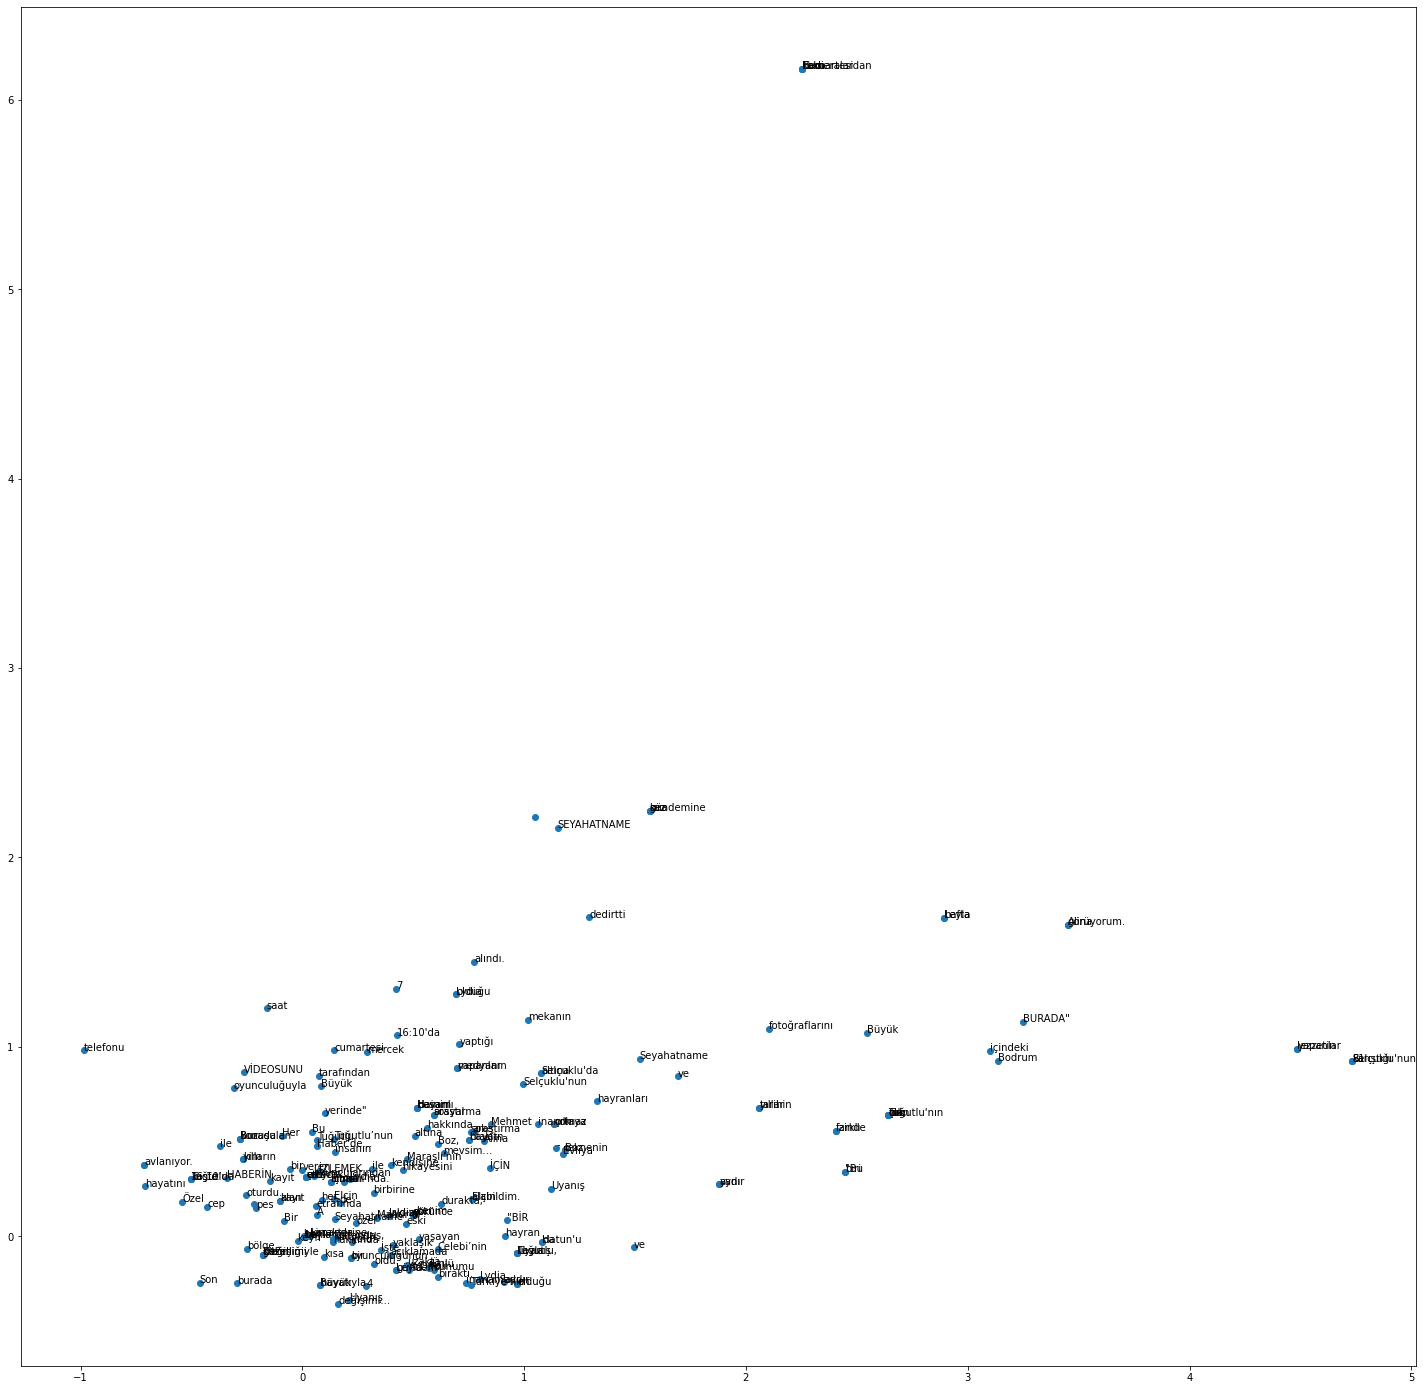

In [ ]:
draw(subset_representations_pca, words)

In [ ]:
similarity = dot([target, context], normalize=True, axes=1)
validation_model = Model(inputs=[input_target, input_context], outputs=similarity)

In [ ]:
valid_size = 16 
valid_window = 100
valid_examples = np.random.choice(valid_window, valid_size, replace=False)

class SimilarityCallback:
    def run_sim(self):
        for i in range(valid_size):
            valid_word = inverse_dictionary[valid_examples[i]]
            top_k = 8  # number of nearest neighbors
            sim = self._get_sim(valid_examples[i])
            nearest = (-sim).argsort()[1:top_k + 1]
            log_str = 'Nearest to %s:' % valid_word
            for k in range(top_k):
                close_word = inverse_dictionary[nearest[k]]
                log_str = '%s %s,' % (log_str, close_word)
            print(log_str)

    @staticmethod
    def _get_sim(valid_word_idx):
        sim = np.zeros((vocabulary_upper_limit,))
        in_arr1 = np.zeros((1,))
        in_arr2 = np.zeros((1,))
        in_arr1[0,] = valid_word_idx
        for i in range(vocabulary_upper_limit):
            in_arr2[0,] = i
            out = validation_model.predict_on_batch([in_arr1, in_arr2])
            sim[i] = out
        return sim

In [ ]:
sim_cb = SimilarityCallback()

In [ ]:
sim_cb.run_sim()

Nearest to yer: turunun, testim, Blake,, olmadığını,, yükselmesi, seks, kökü,, sağlıyorlar.,
Nearest to 2: oy, adayların, gururlu, DİTİB, Pfizer, Sudenaz, bıçağını, aktöre,
Nearest to 2021: nerelerde, noktadan, katılım, konuşan, Fatmagül, faaliyetlerinin, etmektedirler., kazanacak.,
Nearest to gün: takımının, için), Uydu,, genelge, düşüşün, kişi, savundu., yaşam,
Nearest to geçen: yukarıda, barındıran, Nevita, 744, korkunç, yaklaşım, aylığı, 786,
Nearest to yapılan: İyon, ilçesi, tamamen, Serengil,, Mahkeme, Gaziantep’te, Saat, liradan,
Nearest to yeni: umudunu, Amerika’nın, alırız, teklifler, doğruladı., 103, imkanlarıyla, kestane,
Nearest to iyi: mürettebattan, ülkesinin, Üzerine, etmediğini, sırtına, oluşmasını, edeceğini, vergi,
Nearest to gelen: Şifa, cenazesine, Ersoy, illere, aile, gecenin, Almanya,, seslerin,
Nearest to olan: pişmiş, önemi, tazeliğini, Bitexen,, (HES), paylaşımı, KPSS, Türkiye’deki,
Nearest to birlikte: fiyatlarına, Koordinasyon, Özmen, tanıtımı, Muhammed’in, Y

In [ ]:
from sklearn.manifold import TSNE
words = ['erkek','kadın']
word_ids = [dictionary[word] for word in words]
encoded_representations_tsne = TSNE(n_components = 2).fit_transform(weights)[:,:2]

subset_representations_tsne = [encoded_representations_tsne[i] for i in word_ids]
subset_representations_tsne

[array([-26.596937,  -8.784252], dtype=float32),
 array([-12.441838, -51.035778], dtype=float32)]

In [ ]:
#sadi